In [1]:
import pickle
from pathlib import Path
import datetime
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns; sns.set() 
matplotlib.rc('font', **{'size': 18})
import numpy as np
import json
from pprint import pprint
import numpy as np

In [8]:
load_path = "../extracted_2/"
save_path = "../compressed_2/"
if not os.path.exists(save_path):
    os.mkdir(save_path)

In [9]:
files = [entry.name for entry in os.scandir(load_path) if "2019" in entry.name]

In [10]:
print(files)
print(len(files))


['2019-06-12.npy', '2019-08-25.npy', '2019-07-31.npy', '2019-07-02.npy', '2019-07-07.npy', '2019-07-19.npy', '2019-07-17.npy', '2019-08-15.npy', '2019-08-04.npy', '2019-06-10.npy', '2019-08-10.npy', '2019-06-26.npy', '2019-09-30.npy', '2019-08-26.npy', '2019-09-13.npy', '2019-06-29.npy', '2019-08-13.npy', '2019-07-26.npy', '2019-07-21.npy', '2019-06-08.npy', '2019-07-15.npy', '2019-09-06.npy', '2019-09-11.npy', '2019-09-26.npy', '2019-06-04.npy', '2019-08-16.npy', '2019-07-18.npy', '2019-08-05.npy', '2019-07-08.npy', '2019-09-20.npy', '2019-08-12.npy', '2019-07-13.npy', '2019-09-16.npy', '2019-06-03.npy', '2019-06-30.npy', '2019-07-14.npy', '2019-07-22.npy', '2019-08-27.npy', '2019-07-25.npy', '2019-08-22.npy', '2019-06-19.npy', '2019-08-31.npy', '2019-08-11.npy', '2019-06-06.npy', '2019-06-27.npy', '2019-07-06.npy', '2019-06-07.npy', '2019-06-20.npy', '2019-08-24.npy', '2019-08-20.npy', '2019-09-23.npy', '2019-08-14.npy', '2019-06-16.npy', '2019-08-28.npy', '2019-09-29.npy', '2019-06-

Mean-based subsampling with a fixed window length

In [11]:
WIDTH = 100
for file in files:
    print("Processing file: {}".format(file))
    large = np.load(os.path.join(load_path, file))
    print("\tBefore: ", large.shape)
    comp_shape = (large.shape[0], large.shape[1], large.shape[2] // WIDTH)
    compressed = np.zeros(comp_shape)
    for i in range(comp_shape[2]):
        compressed[:, :, i] = np.mean(large[:, :, WIDTH*i: WIDTH*(i+1)], 2)
    print("\tAfter: ", compressed.shape)
    np.save(os.path.join(save_path, file), compressed)

Processing file: 2019-06-12.npy
	Before:  (3, 15, 6000)
	After:  (3, 15, 60)
Processing file: 2019-08-25.npy
	Before:  (267, 15, 6000)
	After:  (267, 15, 60)
Processing file: 2019-07-31.npy
	Before:  (250, 15, 6000)
	After:  (250, 15, 60)
Processing file: 2019-07-02.npy
	Before:  (12, 15, 6000)
	After:  (12, 15, 60)
Processing file: 2019-07-07.npy
	Before:  (1235, 15, 6000)
	After:  (1235, 15, 60)
Processing file: 2019-07-19.npy
	Before:  (559, 15, 6000)
	After:  (559, 15, 60)
Processing file: 2019-07-17.npy
	Before:  (739, 15, 6000)
	After:  (739, 15, 60)
Processing file: 2019-08-15.npy
	Before:  (243, 15, 6000)
	After:  (243, 15, 60)
Processing file: 2019-08-04.npy
	Before:  (244, 15, 6000)
	After:  (244, 15, 60)
Processing file: 2019-06-10.npy
	Before:  (10, 15, 6000)
	After:  (10, 15, 60)
Processing file: 2019-08-10.npy
	Before:  (245, 15, 6000)
	After:  (245, 15, 60)
Processing file: 2019-06-26.npy
	Before:  (11, 15, 6000)
	After:  (11, 15, 60)
Processing file: 2019-09-30.npy
	Bef

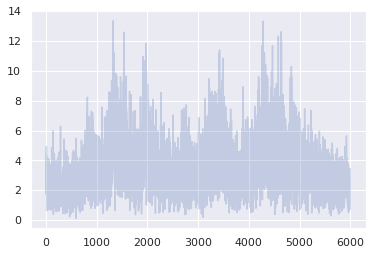

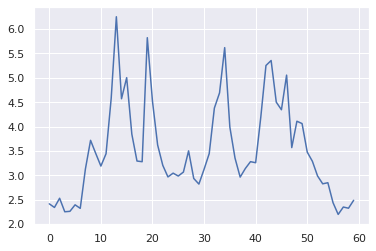

In [27]:
test = np.load(os.path.join("../extracted/", "2019-07-06.npy"))
compressed = np.load(os.path.join("../compressed/", "2019-07-06.npy"))

plt.plot(test[0, 0, :], alpha=0.25)
plt.show()
plt.plot(compressed[0, 0, :])
plt.show()